In [107]:
import pickle
import pandas as pd
import numpy as np
import io
import shap
from sklearn.inspection import PartialDependenceDisplay

In [2]:
# first import the cycling data and model
file_testdata = open('../bike_data/bike_testdata.csv', 'rb')
y_test = pd.read_csv(file_testdata)

file_nn = open('../bike_data/bikeREG_nn.pkl', 'rb')
nn = pickle.load(file_nn)

In [72]:
# first import the cycling data and model
file_testdata = open('../datasets/titanic_testdata.csv', 'rb')
y_test = pd.read_csv(file_testdata)

# train
file_traindata = open('../datasets/titanic_train.csv', 'rb')
X_train = pd.read_csv(file_traindata)

file_nn = open('../datasets/titanic_nn.pkl', 'rb')
nn = pickle.load(file_nn)

In [6]:
# first import the cycling data and model
file_testdata = open('../datasets/diabetes_brfss_testdata.csv', 'rb')
y_test = pd.read_csv(file_testdata)

file_nn = open('../datasets/diabetes_brfss_nn.pkl', 'rb')
nn = pickle.load(file_nn)

In [74]:
means = y_test.mean().to_frame().T
explainer = shap.KernelExplainer(nn.predict, X_train)

Using 1047 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [105]:
INDEX = 31
item = y_test.iloc[[INDEX]].copy()
item['age'] = 30 # original age was 16
item['fare'] = 48
#item['body'] = 0
item['sibsp'] = 1
item

,pclass,sex,age,sibsp,parch,fare,body
31,1,1,30,1,1,48,160.809917


In [54]:
"prediction: " + str(nn.predict(item)) # use predict_proba for classification problems (diabetes), predict for regression (bikes)

'prediction: [0]'

  0%|          | 0/1 [00:00<?, ?it/s]

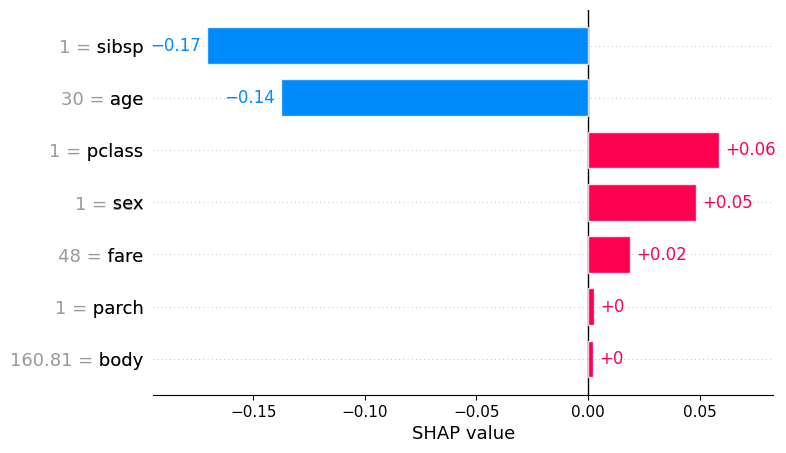

In [106]:
expl = explainer(item)
shap.plots.bar(expl[0])

In [64]:
global_expl = explainer(y_test)

NameError: name 'KernelExplainer' is not defined

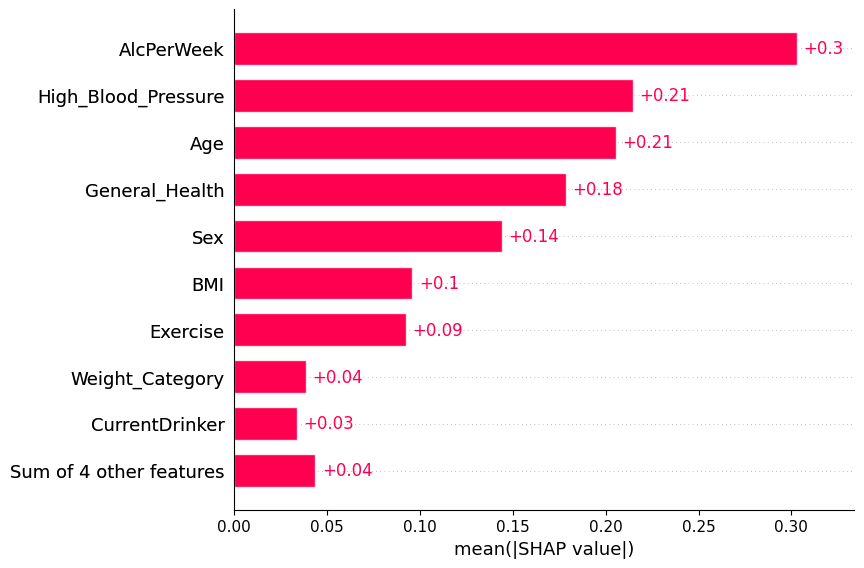

In [67]:
shap.plots.bar(global_expl)

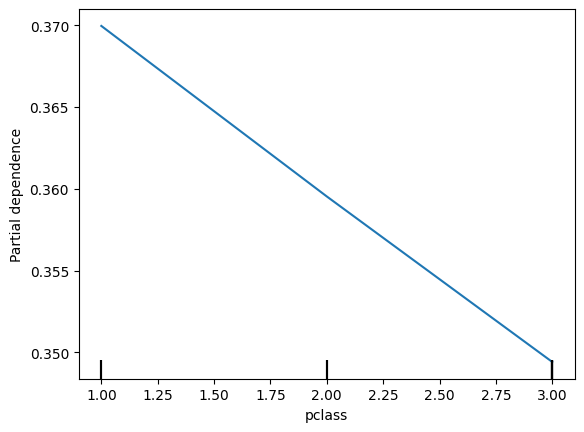

In [114]:
# and now PDP plots
pdp = PartialDependenceDisplay.from_estimator(nn, X_train, ["pclass"])

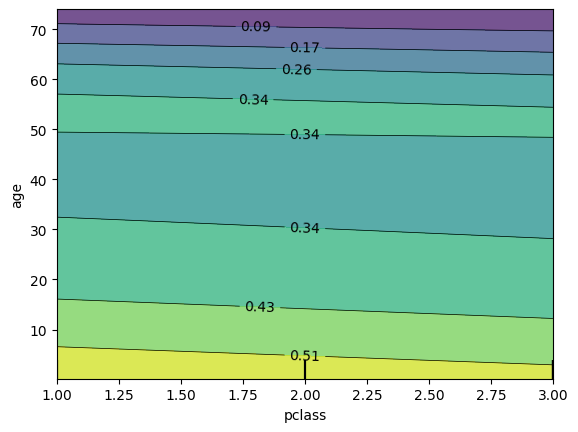

In [115]:
pdp = PartialDependenceDisplay.from_estimator(nn, X_train, [("pclass", "age")])

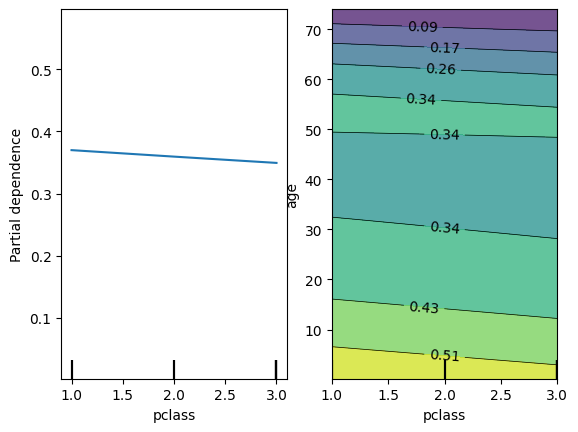

In [116]:
pdp = PartialDependenceDisplay.from_estimator(nn, X_train, ["pclass", ("pclass", "age")])